In [ ]:
#!pip install gym
#pip install gymnasium #opcional
#!pip install swig
#!pip install "gymnasium[box2d]"
#!pip install "stable-baselines[extra]"

In [ ]:
import gym
#import gymnasium as gym
from random import randint
import numpy as np

In [ ]:
env = gym.make("MountainCar-v0", render_mode="human")

In [ ]:
'''def discretizar(valor):
    aux = ((valor[0]-env.observation_space.low)/(env.observation_space.high-env.observation_space.low))*20
    return tuple(aux.astype(np.int32))'''

In [ ]:
#
def discretizar(valor):
    # Normaliza y escala las observaciones al rango [0, 20)
    aux = ((valor - env.observation_space.low) / 
           (env.observation_space.high - env.observation_space.low)) * 20
    
    # Asegúrate de que los valores estén dentro de [0, 19]
    #aux = np.clip(aux, 0, 19)
    return tuple(aux.astype(np.int32))

In [ ]:
#El Q-table (tabla de valores Q) es una estructura de datos fundamental en el aprendizaje por refuerzo (Reinforcement Learning, RL), especialmente en el algoritmo de Q-learning. Su propósito es almacenar y actualizar los valores de acción en función de las experiencias del agente durante el proceso de aprendizaje.
q_table = np.random.uniform(low=-1, high=1, size=[20,20,3])

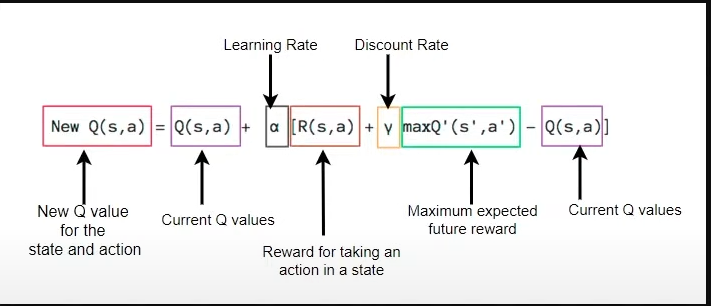

In [ ]:


# Configuración del entorno
env = gym.make("MountainCar-v0", render_mode="human")  # rgb_array Cambiar a "human" si deseas renderizado gráfico
q_table = np.zeros((20, 20, 3))  # Dimensiones ajustadas
tasa_aprendizaje = 0.1
factor_descuento = 0.95  #si esta cerca a 0 busca las recomensas mas cercanas, si se pone cercano a 1, busca las recompensas mas lejanas.
episodios = 5000
listado_recompensas = []

for episodio in range(episodios):
    estado = discretizar(env.reset()[0])  # Ajustar si reset devuelve (obs, info)
    final = False
    recompensa_total = 0

    while not final:
        if np.random.rand() > 0.2:  # Explotación
            accion = np.argmax(q_table[estado])
        else:  # Exploración
            accion = randint(0, 2)
        
        nuevo_estado, recompensa, truncado, final, info = env.step(accion)
        #print(f"Final después de paso: {final}")
        nuevo_estado_discreto = discretizar(nuevo_estado)
        
        # Actualización de Q-table
        q_table[estado][accion] += tasa_aprendizaje * (
            recompensa + factor_descuento * np.max(q_table[nuevo_estado_discreto]) - q_table[estado][accion]
        )
        estado = nuevo_estado_discreto
        recompensa_total += recompensa
        # Renderiza cada 500 episodios
        if (episodio + 1) % 500 == 0:
            if env.render_mode == "human":
                env.render()

    listado_recompensas.append(recompensa_total)

    print(f'(episodio + 1) % 100 = {(episodio + 1) % 100}')
    if (episodio + 1) % 100 == 0:
        print(f"Episodio {episodio + 1}, Recompensa promedio: {np.mean(listado_recompensas[-500:])}")
        

# Cierra el entorno después de todo el entrenamiento
env.close()



In [2]:
import numpy as np
import random

# Parámetros
tasa_aprendizaje = 0.1  # Learning rate
factor_descuento = 0.9  # Discount factor (en este caso puede no ser relevante para aprendizaje no supervisado)
epsilon = 1.0  # Tasa de exploración inicial
epsilon_min = 0.1  # Tasa mínima de exploración
epsilon_decay = 0.995  # Decaimiento de la tasa de exploración

# Definir el entorno (simple cuadrícula 5x5)
n_states = 25  # 5x5 grid (25 estados)
n_actions = 4  # Arriba, abajo, izquierda, derecha

# Inicializar Q-table (n_states x n_actions)
q_table = np.zeros((n_states, n_actions))

# Función de recompensa (por ejemplo, una recompensa positiva al mover el agente a un estado aleatorio)
def obtener_recompensa(estado):
    # En este caso, se le da una pequeña recompensa aleatoria para fomentar la exploración
    return random.uniform(0, 1)  # Recompensas aleatorias para exploración

# Función para elegir acción con política epsilon-greedy
def elegir_accion(estado, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, n_actions - 1)  # Exploración: acción aleatoria
    else:
        return np.argmax(q_table[estado])  # Explotación: elegir la acción con mayor recompensa

# Entrenamiento con Q-Learning
episodios = 5000
listado_recompensas = []

for episodio in range(episodios):
    estado = random.randint(0, n_states - 1)  # Inicializar el estado aleatoriamente
    final = False
    recompensa_total = 0

    while not final:
        accion = elegir_accion(estado, epsilon)  # Elegir acción según epsilon-greedy

        # Realizar la acción y observar el nuevo estado
        # Aquí, para este ejemplo simple, solo se genera un nuevo estado aleatorio
        nuevo_estado = random.randint(0, n_states - 1)
        recompensa = obtener_recompensa(nuevo_estado)

        # Actualización de la Q-table
        q_table[estado][accion] += tasa_aprendizaje * (
            recompensa + factor_descuento * np.max(q_table[nuevo_estado]) - q_table[estado][accion]
        )

        # Actualizar el estado y acumular la recompensa total
        estado = nuevo_estado
        recompensa_total += recompensa

        # Determinar si el episodio ha terminado (en este caso, terminamos después de 100 pasos)
        if recompensa_total > 50:  # Terminar si la recompensa total es mayor que 50
            final = True

    # Reducir epsilon para aumentar la explotación con el tiempo
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    listado_recompensas.append(recompensa_total)

    # Mostrar el progreso
    if (episodio + 1) % 50 == 0:
        print(f"Episodio {episodio + 1} - Recompensa promedio: {np.mean(listado_recompensas[-50:])}")

# Mostrar los resultados finales
print("Q-table final:")
print(q_table)


Episodio 50 - Recompensa promedio: 50.33002285772387
Episodio 100 - Recompensa promedio: 50.34473658771093
Episodio 150 - Recompensa promedio: 50.26590181118563
Episodio 200 - Recompensa promedio: 50.328093048653166
Episodio 250 - Recompensa promedio: 50.29302534221028
Episodio 300 - Recompensa promedio: 50.34002195828991
Episodio 350 - Recompensa promedio: 50.347457216062075
Episodio 400 - Recompensa promedio: 50.32735395963161
Episodio 450 - Recompensa promedio: 50.27815045381537
Episodio 500 - Recompensa promedio: 50.287503972383455
Episodio 550 - Recompensa promedio: 50.326091240347715
Episodio 600 - Recompensa promedio: 50.29064443533323
Episodio 650 - Recompensa promedio: 50.30192624355831
Episodio 700 - Recompensa promedio: 50.399029654821135
Episodio 750 - Recompensa promedio: 50.373051530757195
Episodio 800 - Recompensa promedio: 50.35530609586656
Episodio 850 - Recompensa promedio: 50.32322049023751
Episodio 900 - Recompensa promedio: 50.330335307047214
Episodio 950 - Recompe